In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from src.fn_basic import fn_upit

2023-04-10 11:03:27,827 - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2023-04-10 11:03:27,827 - NumExpr defaulting to 8 threads.


In [2]:
# Set directory
save_dir = os.path.join("plots", "figures_thesis")

In [3]:
# Get colors
cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
cols_dict = {
    "green": cols.colors[4],  # type: ignore
    "yellow": cols.colors[5],  # type: ignore
    "lavendel": cols.colors[2],  # type: ignore
    "blue": cols.colors[0],  # type: ignore
    "pink": cols.colors[3],  # type: ignore
    "grey": cols.colors[7],  # type: ignore
    "opt": cols.colors[1],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

# Activation functions

In [5]:
x = np.linspace(-10, 10, 1000)

In [6]:
def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)
    return x1

def softplus(x):
    x1=[]
    for i in x:
        x1.append(np.log(1+np.exp(i)))
    return x1

def sigmoid(x):
    x1=[]
    for i in x:
        x1.append(1/(1+np.exp(-i)))
    return x1

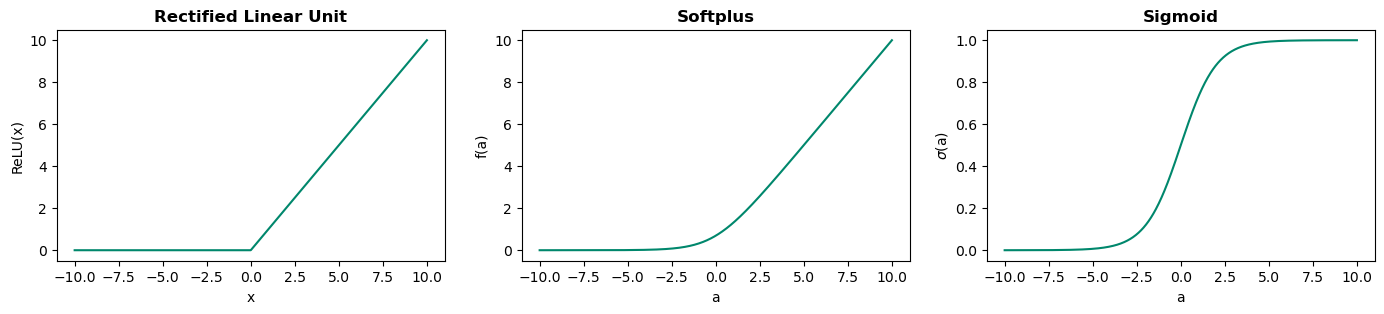

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17,3), squeeze=False)

for idx, ax in enumerate(axs[0]):
    if idx==0:
        sns.lineplot(x=x, y=RELU(x), ax=ax, color=kit_cols_dict["green"])
        ax.set_title("Rectified Linear Unit", fontweight='bold')
        ax.set_xlabel("x")
        ax.set_ylabel("ReLU(x)")
    elif idx==1:
        sns.lineplot(x=x, y=softplus(x), ax=ax, color=kit_cols_dict["green"])
        ax.set_title("Softplus", fontweight='bold')
        ax.set_xlabel("a")
        ax.set_ylabel("f(a)")
    elif idx==2:
        sns.lineplot(x=x, y=sigmoid(x), ax=ax, color=kit_cols_dict["green"])
        ax.set_title("Sigmoid", fontweight='bold')
        ax.set_xlabel("a")
        ax.set_ylabel(r"$\sigma$(a)")

filename=os.path.join(save_dir, "02_activation_functions.pdf")
fig.savefig(filename, bbox_inches='tight')

# Over- and underdispersed PITs

In [93]:
x_values = np.linspace(start=0, stop=1, num=20)

In [94]:
def overdispersed(factor, x, height):
    return factor*(x-0.5)**2 + height

In [95]:
for x, y in zip(x_values, overdispersed(-2, x_values, 1.3)):
    print(f"({x:.2f}, {y:.2f})")

(0.00, 0.80)
(0.05, 0.90)
(0.11, 0.99)
(0.16, 1.07)
(0.21, 1.13)
(0.26, 1.19)
(0.32, 1.23)
(0.37, 1.27)
(0.42, 1.29)
(0.47, 1.30)
(0.53, 1.30)
(0.58, 1.29)
(0.63, 1.27)
(0.68, 1.23)
(0.74, 1.19)
(0.79, 1.13)
(0.84, 1.07)
(0.89, 0.99)
(0.95, 0.90)
(1.00, 0.80)


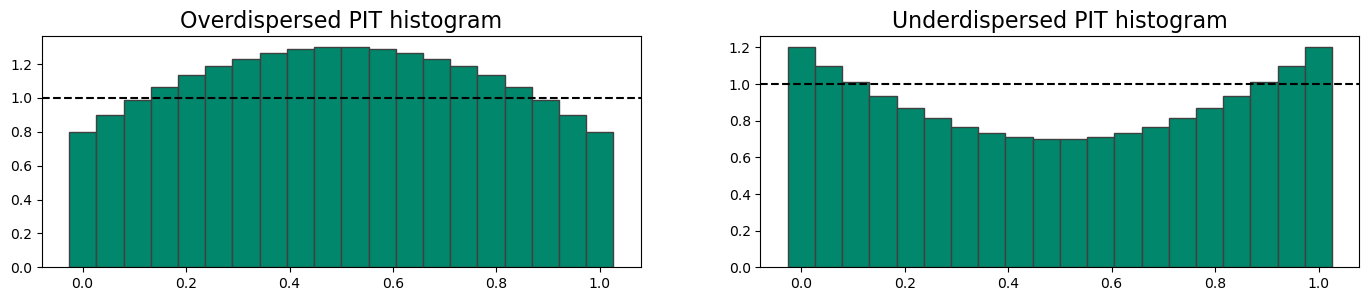

In [103]:
fontsize=16

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17,3), squeeze=False)

axs[0][0].bar(x=x_values, width=0.05263158, height=overdispersed(-2, x_values, 1.3), edgecolor=kit_cols_dict["grey"], color=kit_cols_dict["green"])
axs[0][0].axhline(y=1, linestyle="dashed", color=kit_cols_dict["black"])
axs[0][0].set_title("Overdispersed PIT histogram", fontsize=fontsize)

axs[0][1].bar(x=x_values, width=0.05263158, height=overdispersed(2, x_values, 0.7), edgecolor=kit_cols_dict["grey"], color=kit_cols_dict["green"])
axs[0][1].axhline(y=1, linestyle="dashed", color=kit_cols_dict["black"])
axs[0][1].set_title("Underdispersed PIT histogram", fontsize=fontsize)

filename=os.path.join(save_dir, "02_pit_example.pdf")
fig.savefig(filename, bbox_inches='tight')